#**EDA de la base de datos Daily Demand Forecasting Orders**


##1.- Descripción del problema y de los datos
Esta base de datos se generó y utilizó en una investigación académica de la Universidad Nove de Julho por \citep{} et al , quienes mediante una red neuronal MLP predicen la demanda diaria de pedidos de una empresa logistica brasileña. El nombre de la base de datos es "Daily Demand Forecasting Orders" (de ahora en adelante llamado "conjunto de datos DDFO"), la cual corresponde a un conjunto de series temporales con doce variables de entrada y una variable objetivo. La mediciones fueron realizadas diariamente por 60 días. A continuación se presentan las variables y sus descripciones: 



1.   Week_of_the_month: Valor entero que representa la semana del mes en que fue tomada la medición, estas pueden ser 1, 2, 3, 4 o 5. 
2.   Day_of_the_week: Valor entero que representa el día de la semana en que fue tomada la medición. Los días de mediciones son de lunes a viernes y los números que los representan son del 2 al 6 respectivamente.
3.   Non_urgent_order: Valor entero que representa la cantidad de pedidos no urgentes.
4.   Urgent_order: Valor entero que representa la cantidad de pedidos urgentes.
5.   Order_type_A: Valor entero que representa la cantidad de pedidos de tipo A.
6.   Order_type_B: Valor entero que representa la cantidad de pedidos de tipo B.
7.   Order_type_C: Valor entero que representa la cantidad de pedidos de tipo C.
8.   Fiscal_sector_orders: Valor entero que representa la cantidad de pedidos del sector fiscal.
9.   Orders_from_the_traffic_controller_sector: Valor entero que representa la cantidad de pedidos del sector de control de tráfico.
10.   Banking_orders_(1): Valor entero que representa la cantidad de pedidos del banco 1.
11.   Banking_orders_(2): Valor entero que representa la cantidad de pedidos del banco 2.
12.   Banking_orders_(3): Valor entero que representa la cantidad de pedidos del banco 3.
13.   Target_(Total_orders): Valor entero que corresponde a la variable objetivo y representa la cantidad de pedidos totales para el día.








##2.- Análisis de la estructura general de los datos.


In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/codigos/data/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/codigos/data


In [ ]:
ls

Daily_Demand_Forecasting_Orders.csv  Daily_Demand_Forecasting_Orders.xlsx


In [3]:
import pandas as pd
df = pd.read_csv('Daily_Demand_Forecasting_Orders.csv', delimiter = ';', header=0)
df.head()

Week of the month (first week, second, third, fourth or fifth week  ...  Target (Total orders)
0                                                  1                   ...                539.577
1                                                  1                   ...                224.675
2                                                  1                   ...                129.412
3                                                  2                   ...                317.120
4                                                  2                   ...                210.517

[5 rows x 13 columns]

In [4]:
df = df.rename(columns={'Week of the month (first week, second, third, fourth or fifth week': 'Week_of_the_month',
                        'Day of the week (Monday to Friday)': 'Day_of_the_week',
                        'Non-urgent order': 'Non_urgent_order',
                        'Urgent order': 'Urgent_order',
                        'Order type A': 'Order_type_A',
                        'Order type B': 'Order_type_B',
                        'Order type C': 'Order_type_C',
                        'Fiscal sector orders': 'Fiscal_sector_orders',
                        'Orders from the traffic controller sector': 'Orders_from_the_traffic_controller_sector',
                        'Banking orders (1)': 'Banking_orders_(1)',
                        'Banking orders (2)': 'Banking_orders_(2)',
                        'Banking orders (3)': 'Banking_orders_(3)',
                        'Target (Total orders)': 'Target_(Total_orders)',})

df.head()

Week_of_the_month  ...  Target_(Total_orders)
0                  1  ...                539.577
1                  1  ...                224.675
2                  1  ...                129.412
3                  2  ...                317.120
4                  2  ...                210.517

[5 rows x 13 columns]

In [5]:
import numpy as np
# summarize
print(df.shape)
# trim and transform to floats
data = df.values
# summarize amount of missing data
total_missing = np.count_nonzero(np.isnan(data))
percent_missing = total_missing / data.size * 100
print('Total Missing: %d/%d (%.1f%%)' % (total_missing, data.size, percent_missing))

(60, 13)
Total Missing: 0/780 (0.0%)


In [6]:
print(data.shape[1])

13


###2.1- Exploración de la estructura temporal de las variables

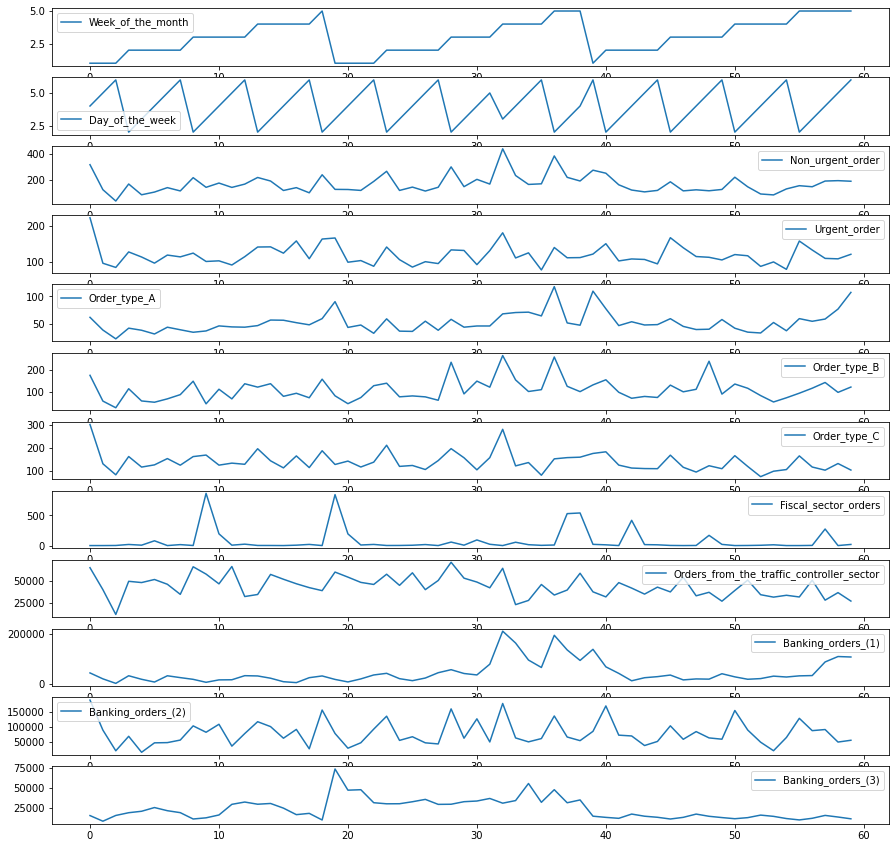

In [18]:
# plot all columns for one or more chunk ids
def plot_line_data(data, columnsToPlot, names_columns):
  pyplot.figure(figsize = (15,15))
  for i in range(len(columnsToPlot)):
    ax = pyplot.subplot(len(columnsToPlot), 1, i+1)
    column = columnsToPlot[i]
    pyplot.plot(data[:,column], label=names_columns[column])
    pyplot.legend()
  pyplot.show()



data = df.values
inputs = range(0, 12)
name_columns = df.columns
# plot inputs for some chunks
plot_line_data(data, inputs, name_columns)

###2.2- Exploración de la distribución de las variables

In [ ]:
import numpy as np
# boxplot for columns  for a chuck
def boxplot_data(dataframe):
  pyplot.figure(figsize = (15,15))
  dataframe.boxplot()
  pyplot.show()


# boxplot for input variables
boxplot_data(df)

#3- Resumen resultados y termino primera iteración

Fue posible visualizar la estructura temporal de los datos mediante graficos de linea, además de analizar la distribución de los datos mediantes gráficos de caja. Los datos no contine valores perdidos y pareciera no contener datos anomalos. Se decido proceder al preprocesamiento solo cambiando los nombres de las columnas de los datos.

In [ ]:
df.to_csv('renamedData.csv', index = False)